# 範例說明

假設你的公司研發出一款新泡麵產品，在公司裡面做了多次煮泡麵測試，其數據如下，

| 煮麵員 | 烹煮時間 | 試吃員 | 評價 |
| :----:| :----: | :----: | :----: |
| 小美 | 5 | 小呆 | 難吃 |
| 小美 | 10 | 小美 | 好吃 |
| 小華 | 7 | 小呆 | 可以吃 |
| 小華 | 15 | 小美 | 太糊 |
| 小呆 | 8 | 小萌 | 可以吃 |
| 小呆 | 13 | 小美 | 可以吃 |

做完實驗以後公司要求你撰寫一份說明書，去給可愛的客戶看，大家都知道一般客戶是沒什麼概念的，你應該建議客戶要煮多久時間的泡麵呢? <br>
大家都知道客戶在煮麵的時候可能會有很多干擾，像是跑出去接電話，也可能肚子太餓等不及，所以你覺得要怎麼建議你的客戶煮麵時間他才會滿意，是7分鐘? 還是13分鐘?

# Support vector machine （SVM）

* 中文叫 "支持向量機"
* 是監督學習的方法
* 可以用來做分類（classification），回歸（regression）
* 發現新的類別、異常偵測

# pros and cons 優點和缺點

SVM 的優點有
- 在高維空間裡也很有效
- 對於數據維度遠高於數據樣本量的情況也有效
- 內存需求很少(因為他的算法只會跟邊界值有關，其他不重要)
- 可以選不同核函數去處理不同的數據

SVM 的缺點有
- SVM 不直接提供機率估計
- 如果特徵（features）的數量遠大於樣本（samples）的數量，容易over-fitting，需要"選擇適合的 kernel 函數"與"正規化"的處理

# 下面來談談 SVM 的想法，假設我們收集了兩群資料

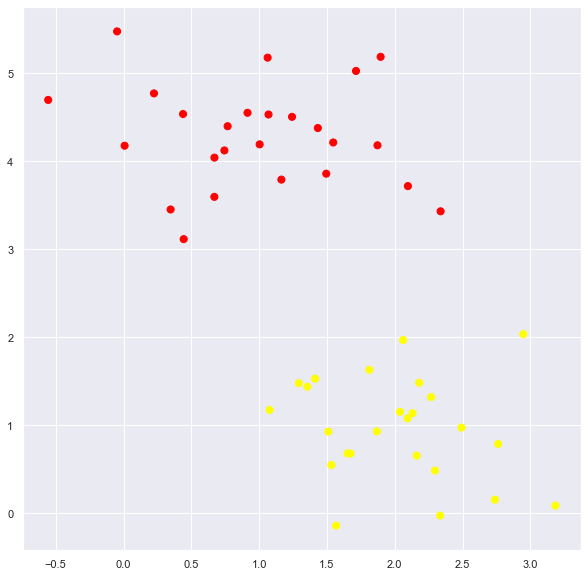

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = [10, 10]

X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

我們很自然地會想用直線去區分開來，但是問題來了，要用哪條直線?

(-1.0, 3.5)

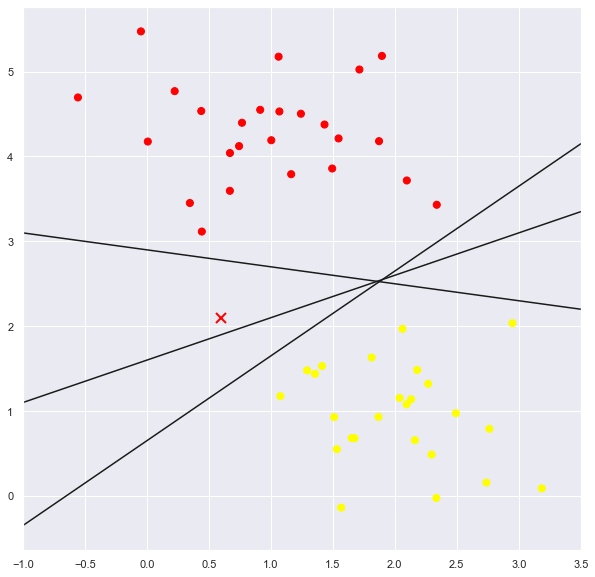

In [2]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# 紅 X
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

# 三條分隔線
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

假設紅色 X 是新來的資料，對於舊有資料上面的三條線，哪一條都可以完美的完成任務，但是對於新來的資料(紅 X)，三條線會有不同的看法，這時候 SVM 就跳出來說，我們需要嚴謹一點的方法來嚴肅對待這個問題

# SVM: Maximizing the Margin
SVM 就跳出來說啦，我們選的分割線可以離他們的邊界越遠越好啊

(-1.0, 3.5)

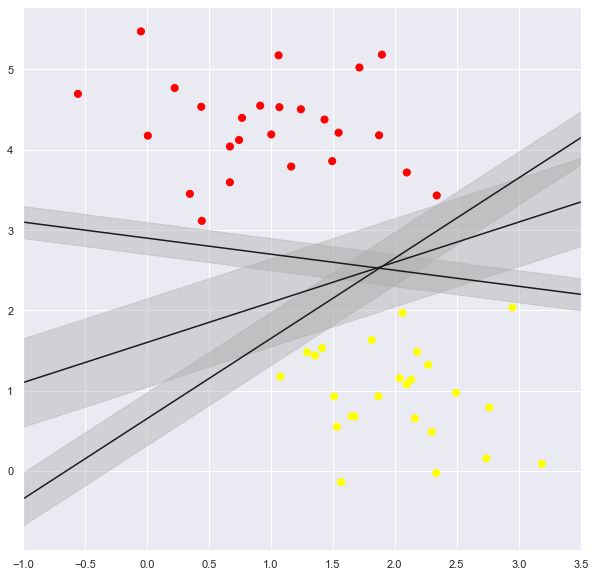

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

我們來看看邊界值

(-0.41872382476349596, 5.754870487889891)

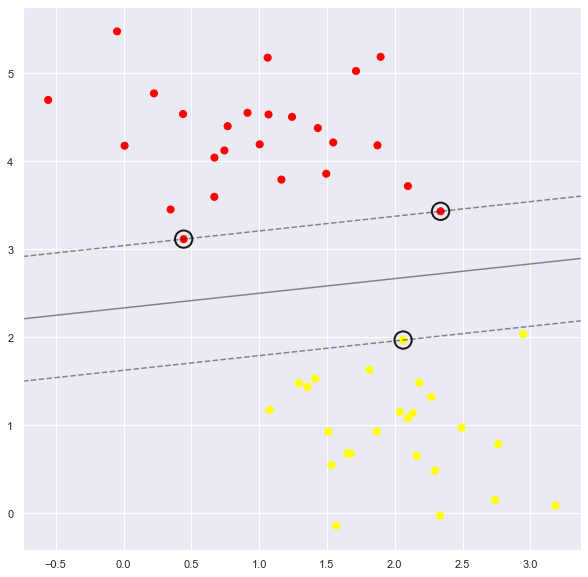

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

from scipy import stats
import seaborn as sns; sns.set()
from sklearn import datasets
from sklearn.svm import SVC # "Support vector classifier"

X, y = datasets.make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

classifier = SVC(kernel='linear', C=1E10)
classifier.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

axis = plt.gca()
xlim = axis.get_xlim()
ylim = axis.get_ylim()

# create grid to evaluate model
x = np.linspace(xlim[0], xlim[1], 30)
y = np.linspace(ylim[0], ylim[1], 30)
y_mg, x_mg = np.meshgrid(y, x)
xy = np.vstack([x_mg.ravel(), y_mg.ravel()]).T
P = classifier.decision_function(xy).reshape(x_mg.shape)

# plot decision boundary and margins
axis.contour(x_mg, y_mg, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

axis.scatter(classifier.support_vectors_[:, 0],
               classifier.support_vectors_[:, 1],
               s=300, linewidth=2, edgecolors='k', facecolors='none')


axis.set_xlim(xlim)
axis.set_ylim(ylim)

# support_vectors_

我們可以用 support_vectors_ 看到決策的邊界值。



In [5]:
# 這是他的邊界值

classifier.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

# LinearSVC, NuSVC, SVC difference


In scikit SVC and nuSVC are mathematically equivalent with both methods based on the library libsvm. The main difference is that SVC uses the parameter C while nuSVC uses the parameter nu.

LinearSVC is based on the library liblinear. As the documentation says, LinearSVC is similar to SVC with parameter kernel='linear', but liblinear offers more penalties and loss functions in order to scale better with large numbers of samples. Please check out this question and this question for more details.

我們接下來要進入實戰環節，看 scikit learn 裡面提供哪些回歸 （regression）與分類 （classification）方法。

# Classification 

scikit learn 裡提供了 LinearSVC, NuSVC, SVC，我們下面直接看使用範例。



In [6]:
# LinearSVC 
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=4, random_state=87)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

classifier = LinearSVC(C=1, random_state=87, tol=1e-5)
classifier.fit(X_train, y_train)

print('Training accuracy: ', classifier.score(X_train, y_train))
print('Testing accuracy: ', classifier.score(X_test, y_test))

classifier.predict(X_test)

Training accuracy:  0.87375
Testing accuracy:  0.825


array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1])

In [7]:
# SVC
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=4, random_state=87)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
classifier = SVC(C=2, kernel='poly', random_state=87, tol=1e-5)
classifier.fit(X_train, y_train)

print('Training accuracy: ', classifier.score(X_train, y_train))
print('Testing accuracy: ', classifier.score(X_test, y_test))

classifier.predict(X_test)

Training accuracy:  0.8325
Testing accuracy:  0.795


array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1])

In [8]:
# NuSVC
from sklearn.svm import NuSVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=4, random_state=87)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
classifier = NuSVC(nu=0.7, kernel='poly', random_state=87, tol=1e-5)
classifier.fit(X_train, y_train)

print('Training accuracy: ', classifier.score(X_train, y_train))
print('Testing accuracy: ', classifier.score(X_test, y_test))

classifier.predict(X_test)

Training accuracy:  0.7925
Testing accuracy:  0.765


array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1])

# Regression

scikit learn 裡提供了 LinearSVR, NuSVR, SVR，我們下面直接看使用範例。


In [9]:
# LinearSVR 
from sklearn.svm import LinearSVR
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=10, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearSVR(C=1, random_state=87, tol=1e-5)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("Mean squared error:", mean_squared_error(y_test, y_pred))

Mean squared error: 6.3134158412856024e-24


In [10]:
# SVR 
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=10, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
regressor = SVR(kernel='rbf', C=1, tol=1e-5)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("Mean squared error:", mean_squared_error(y_test, y_pred))


Mean squared error: 12609.307096466271


In [11]:
# NuSVR 
from sklearn.svm import NuSVR
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=10, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
regressor = NuSVR(kernel='linear', nu=0.7, tol=1e-5)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("Mean squared error:", mean_squared_error(y_test, y_pred))

Mean squared error: 1.2331531247467648e-12
